JOB POSTING EXPLORATORY DATA ANALYSIS 

GOAL

1. Investigate top paying toles and skills in the data science industry
2. Use python to explore a real live data set on job postings
3. For job seekers to use these insigts to help them find the best job opportunities

What are the most demanded skills for the top 3 most popular data roles
How are in demand skills trending for Data Analysts
How well do jobs and skills pay for Data Analysts
What is the most optimal skill to learn for Data Analysts

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("lukebarousse/data_jobs", split="train")

# Convert to a pandas DataFrame
df = dataset.to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df.job_posted_date )
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

# Display the first few rows
df.head()

c:\Users\allen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\allen\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Nov 14 09:26:10 2024).


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [ ]:
#filter for Nigeria data analyst roles

df_da_ng = df[(df['job_country']== 'Nigeria') & (df['job_title_short'] == 'Data Analyst')]

In [7]:
df_da_ng.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
7779,Data Analyst,Data Analyst,"Abuja, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-04-17 13:11:12,False,False,Nigeria,None,NaN,NaN,Logitex Reconnaissance Solutions,"[sql, r, python, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
8785,Data Analyst,Data Analyst,"Abuja, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-03-02 13:26:28,False,False,Nigeria,None,NaN,NaN,ICAP,"[visual basic, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
10461,Data Analyst,Data Analyst,"Abuja, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-04-26 13:19:13,False,False,Nigeria,None,NaN,NaN,Jubaili Agrotec Limited,"[excel, word, powerpoint]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
13803,Data Analyst,Data Analyst (Remote),Nigeria,via MyJobMag,Full-time and Contractor,False,Nigeria,2023-09-21 13:34:10,False,False,Nigeria,None,NaN,NaN,Axiom PRO LLC,"[python, r, sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
21062,Data Analyst,Data Analyst,Nigeria,via LinkedIn Nigeria,Contractor,False,Nigeria,2023-11-10 13:44:30,False,False,Nigeria,None,NaN,NaN,Global Skills Recruitment Agency,"[r, python, sql, spss]","{'analyst_tools': ['spss'], 'programming': ['r..."


COUNT OF DATA ANALYST JOB POSTINGS IN NIGERIA

In [19]:
df_plot = df_da_ng.job_location.value_counts().head().to_frame()   #----------- counts and changes to a dataframe
df_plot


,count
job_location,
"Abuja, Nigeria",106
Nigeria,94
"Lagos, Nigeria",67
Anywhere,10
"Port Harcourt, Nigeria",4


Text(0, 0.5, '')

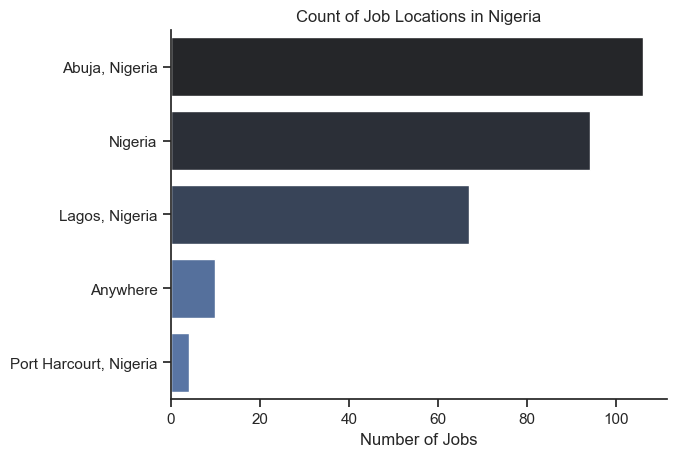

In [29]:
sns.set_theme(style = 'ticks')
sns.barplot(data =df_plot, x = 'count', y = 'job_location', hue = 'count', palette= 'dark:b_r', legend=False)
sns.despine()     #------------to remove black border around chart
plt.title('Count of Job Locations in Nigeria')
plt.xlabel('Number of Jobs')
plt.ylabel('')


OFFERS THAT COMES WITH JOB POSTINGS AND REQUIREMENT

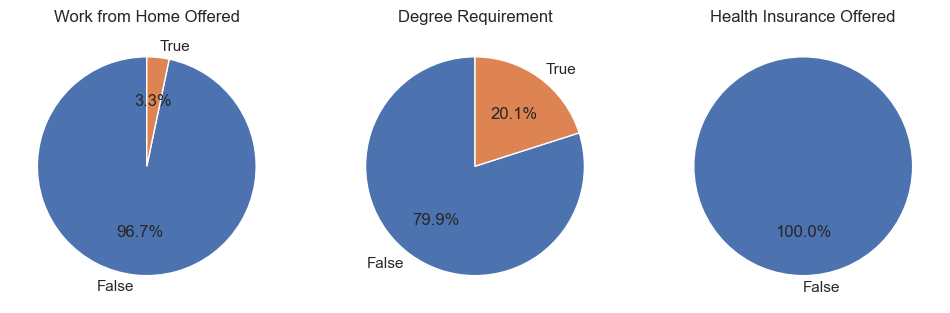

In [ ]:

# Define the dictionary of columns and titles
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create subplots
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Loop through each column and title
for i, (column, title) in enumerate(dict_column.items()):
    # Get value counts for the pie chart
    values = df_da_ng[column].value_counts()
    # Dynamically generate labels from the index of value counts
    labels = values.index.astype(str)  # Convert True/False to string for labeling
    # Create the pie chart
    ax[i].pie(values,labels=labels, autopct='%1.1f%%',startangle=90)     # Dynamically generated labels

    # Set the title for the subplot
    ax[i].set_title(title)

# Display the plots
plt.show()



COMPANIES OFFERING DATA ANALYST JOBS

Text(0, 0.5, '')

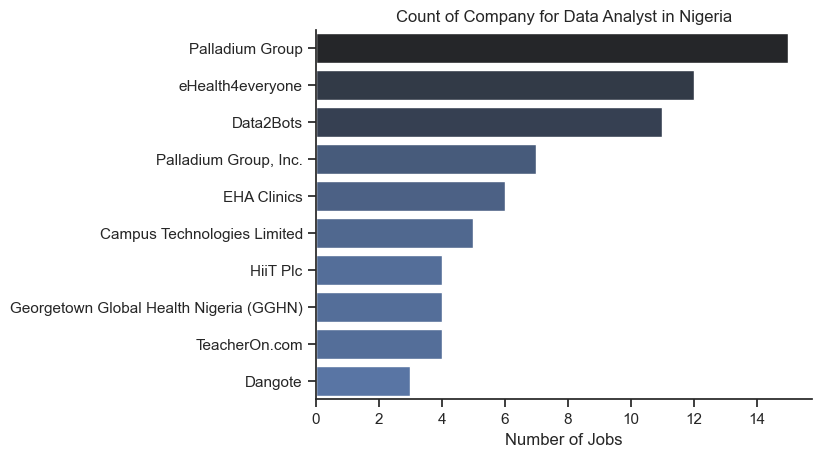

In [31]:
df_company = df_da_ng.company_name.value_counts().head(10).to_frame()   #----------- counts and changes to a dataframe
df_company

sns.set_theme(style = 'ticks')
sns.barplot(data =df_company, x = 'count', y = 'company_name', hue = 'count', palette= 'dark:b_r', legend=False)
sns.despine()     #------------to remove black border around chart
plt.title('Count of Company for Data Analyst in Nigeria')
plt.xlabel('Number of Jobs')
plt.ylabel('')
